In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def showImg(img, colored=False, showAxis=False):
    plt.figure(figsize=(20,20))
    if not showAxis:
        plt.axis("off")
    if (len(img.shape) == 3):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    elif(colored):
        plt.imshow(img)
    else:
        plt.imshow(img, 'gray')

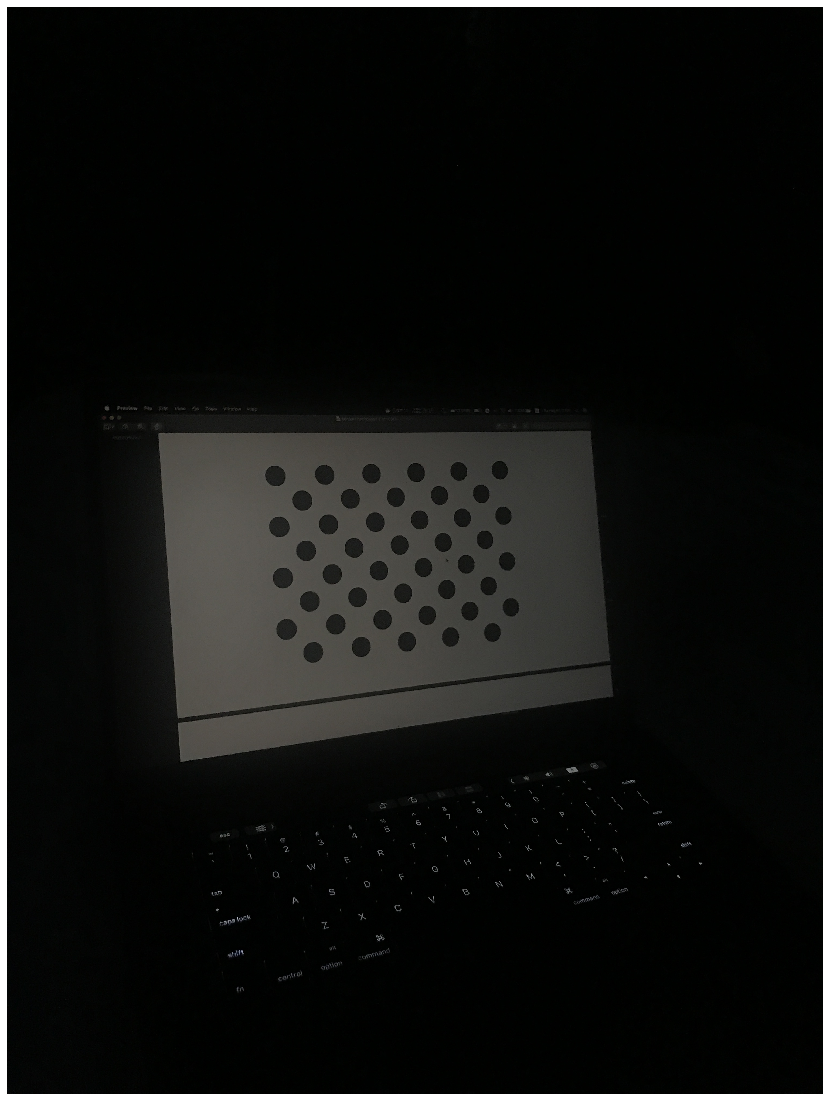

In [4]:
img=cv2.imread('./data/calibration/01.JPG')
showImg(img)

In [5]:
# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()
# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255
# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 1364 # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 6000 # maxArea may be adjusted to suit for your experiment
# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4
# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87
# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01
# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

In [6]:
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
    for y in range(0, 4):
        objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)

In [7]:
objpoints = None # 3d point in real world space imgpoints = None # 2d points in image plane.
imgpoints = None
for f in range(1,2):
    img = cv2.imread("./data/calibration/%02d.jpg" % f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Find the circle grid
    ret, corners = cv2.findCirclesGrid(gray, \
        (4,11), \
        flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING, \
        blobDetector = blobDetector)
    if corners is not None and ret:
        objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
        imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
    else:
        print("Skip %02d.jpg" % f)

(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(mtx)
print(dist)

[[3.62156354e+03 0.00000000e+00 1.51014102e+03]
 [0.00000000e+00 3.56748879e+03 1.97195352e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 3.49774868e-01 -5.42966442e+00 -4.39754165e-04 -6.58449336e-03
   7.29846204e+01]]


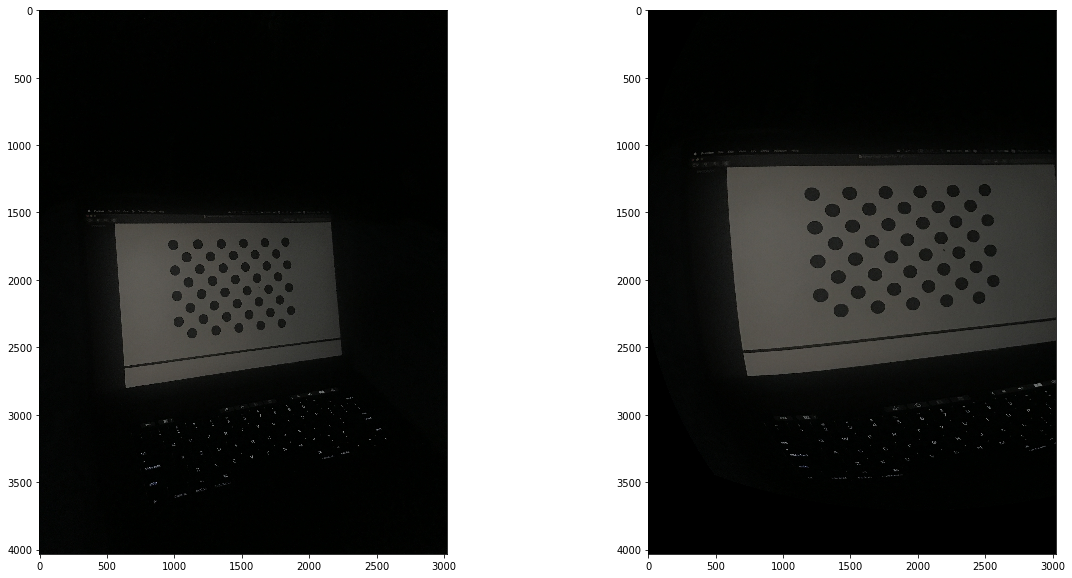

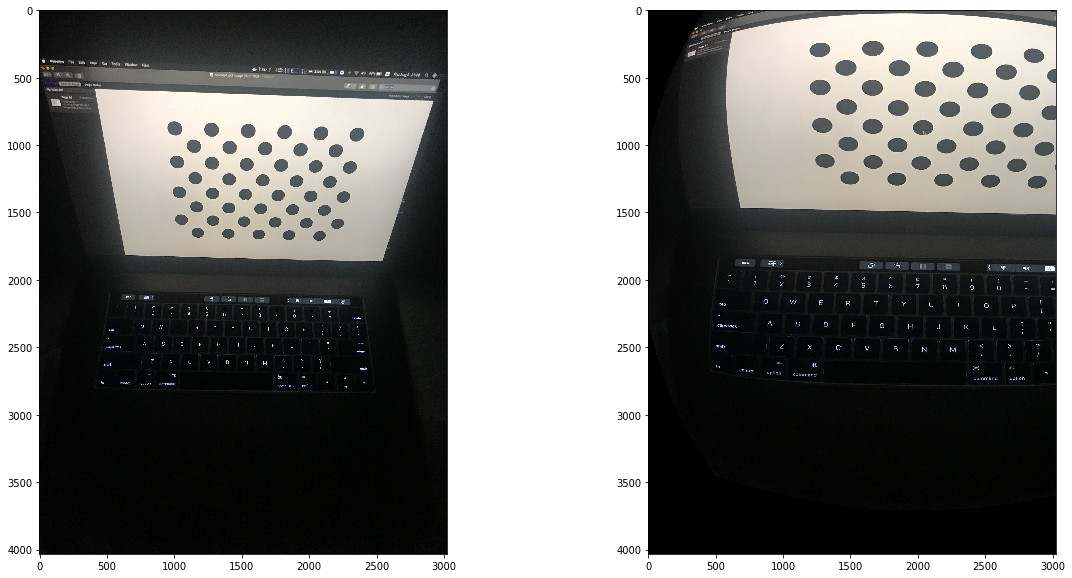

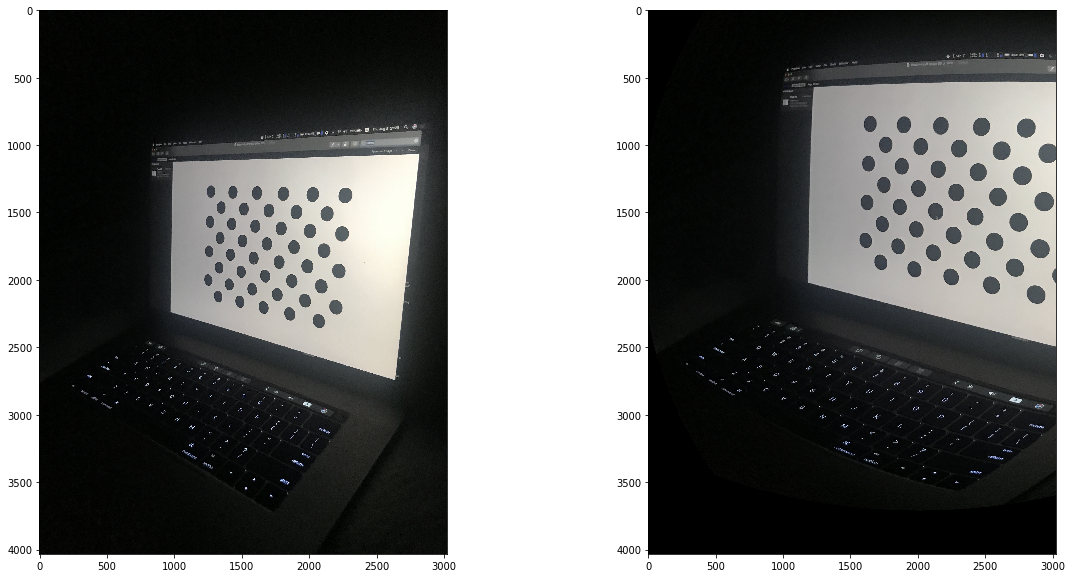

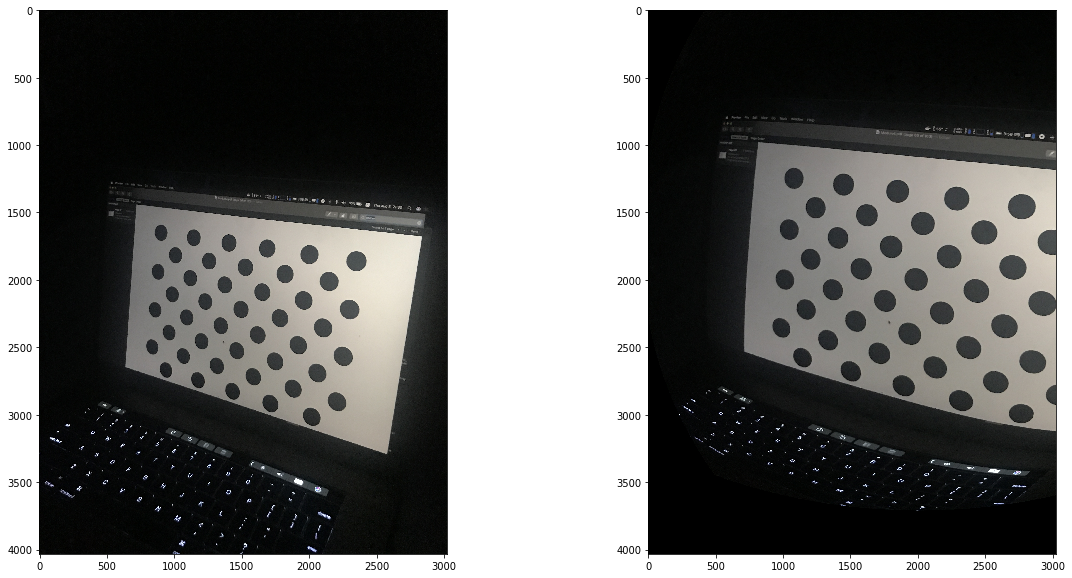

In [12]:
for f in range(1,5):
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches((20,10))
    test = cv2.imread("./data/calibration/%02d.jpg" % f)
#     showImg(test)
    axes[0].imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

    (w, h) = test.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
    axes[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
#     showImg(dst)